In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load saved data
from google.colab import drive
drive.mount('/content/drive')
data = np.load('/content/drive/My Drive/Github/mtc-device-activation/e1_general_model.npz', allow_pickle=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Access the saved data from the .npz file
all_DeviceLocations = data['all_DeviceLocations']
device_count = data['device_count']
num_samples = data['num_samples']

In [ ]:
first_20_devices = all_DeviceLocations[:, :20, :]

In [ ]:
loc = first_20_devices[0]

In [ ]:
distance_matrix = np.linalg.norm(loc[:, np.newaxis, :] - loc[np.newaxis, :, :], axis=2)

In [ ]:
kappa = 5.725
D = 20

In [ ]:
correlation_matrix = 0.5 * np.maximum((np.exp(-distance_matrix / kappa) - np.exp(-D / kappa)) / (1 - np.exp(-D / kappa)),0)
inverse_correlation_matrix = np.linalg.pinv(correlation_matrix)  # Use pseudo-inverse if not invertible

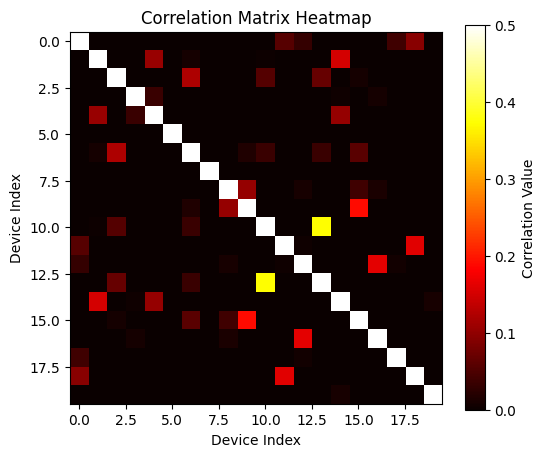

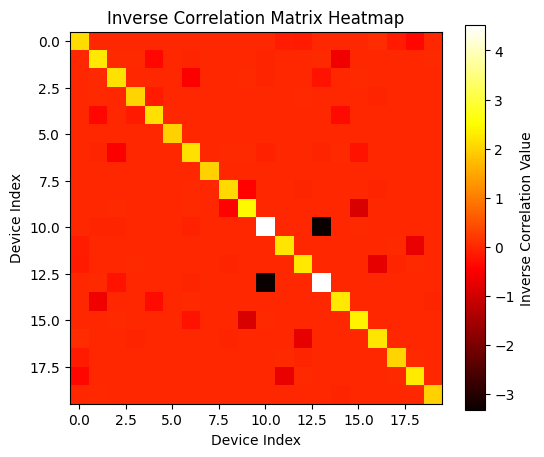

In [ ]:
# Plot correlation matrix
plt.figure(figsize=(6, 5))
plt.imshow(correlation_matrix, cmap='hot', interpolation='nearest')
plt.colorbar(label='Correlation Value')
plt.title('Correlation Matrix Heatmap')
plt.xlabel('Device Index')
plt.ylabel('Device Index')
plt.show()

# Plot inverse correlation matrix
plt.figure(figsize=(6, 5))
plt.imshow(inverse_correlation_matrix, cmap='hot', interpolation='nearest')
plt.colorbar(label='Inverse Correlation Value')
plt.title('Inverse Correlation Matrix Heatmap')
plt.xlabel('Device Index')
plt.ylabel('Device Index')
plt.show()

In [ ]:
inverse_correlation_matrix = 1 - np.maximum((np.exp(-distance_matrix / kappa) - np.exp(-D / kappa)) / (1 - np.exp(-D / kappa)),0)
correlation_matrix = np.linalg.pinv(inverse_correlation_matrix)  # Use pseudo-inverse if not invertible

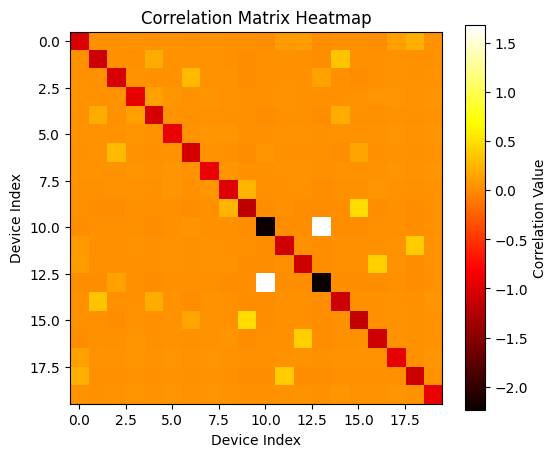

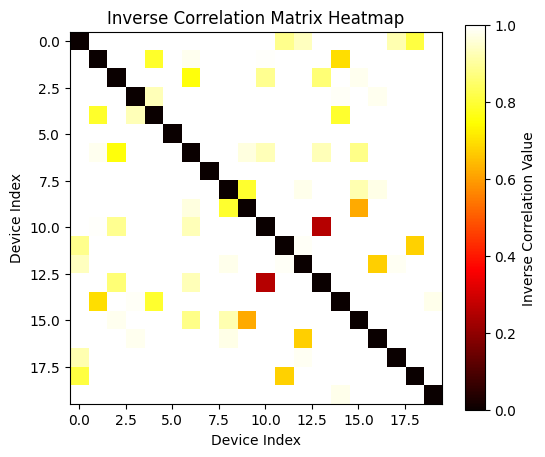

In [ ]:
# Plot correlation matrix
plt.figure(figsize=(6, 5))
plt.imshow(correlation_matrix, cmap='hot', interpolation='nearest')
plt.colorbar(label='Correlation Value')
plt.title('Correlation Matrix Heatmap')
plt.xlabel('Device Index')
plt.ylabel('Device Index')
plt.show()

# Plot inverse correlation matrix
plt.figure(figsize=(6, 5))
plt.imshow(inverse_correlation_matrix, cmap='hot', interpolation='nearest')
plt.colorbar(label='Inverse Correlation Value')
plt.title('Inverse Correlation Matrix Heatmap')
plt.xlabel('Device Index')
plt.ylabel('Device Index')
plt.show()

In [ ]:
inverse_correlation_matrix = 1 - 2 * np.maximum((np.exp(-distance_matrix / kappa) - np.exp(-D / kappa)) / (1 - np.exp(-D / kappa)),0)
correlation_matrix = np.linalg.pinv(inverse_correlation_matrix)  # Use pseudo-inverse if not invertible

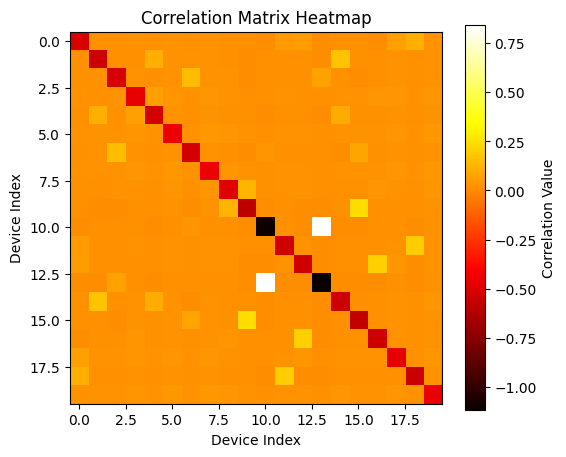

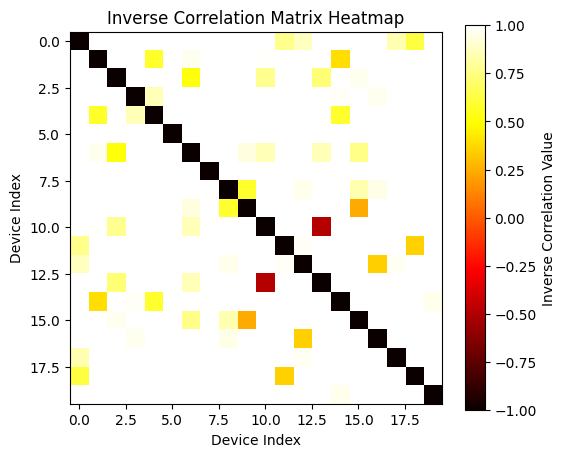

In [ ]:
# Plot correlation matrix
plt.figure(figsize=(6, 5))
plt.imshow(correlation_matrix, cmap='hot', interpolation='nearest')
plt.colorbar(label='Correlation Value')
plt.title('Correlation Matrix Heatmap')
plt.xlabel('Device Index')
plt.ylabel('Device Index')
plt.show()

# Plot inverse correlation matrix
plt.figure(figsize=(6, 5))
plt.imshow(inverse_correlation_matrix, cmap='hot', interpolation='nearest')
plt.colorbar(label='Inverse Correlation Value')
plt.title('Inverse Correlation Matrix Heatmap')
plt.xlabel('Device Index')
plt.ylabel('Device Index')
plt.show()

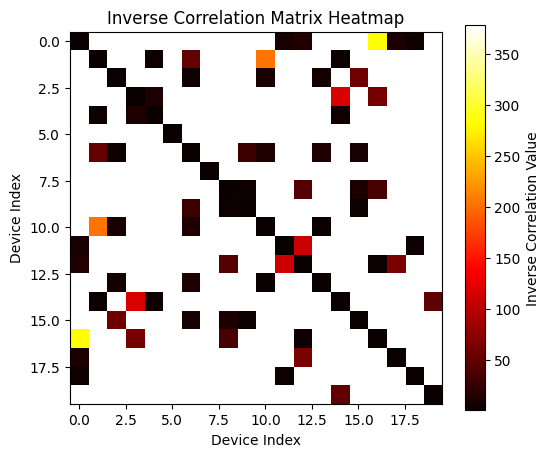

In [ ]:


# Plot inverse correlation matrix
plt.figure(figsize=(6, 5))
plt.imshow(inverse_correlation_matrix, cmap='hot', interpolation='nearest')
plt.colorbar(label='Inverse Correlation Value')
plt.title('Inverse Correlation Matrix Heatmap')
plt.xlabel('Device Index')
plt.ylabel('Device Index')
plt.show()

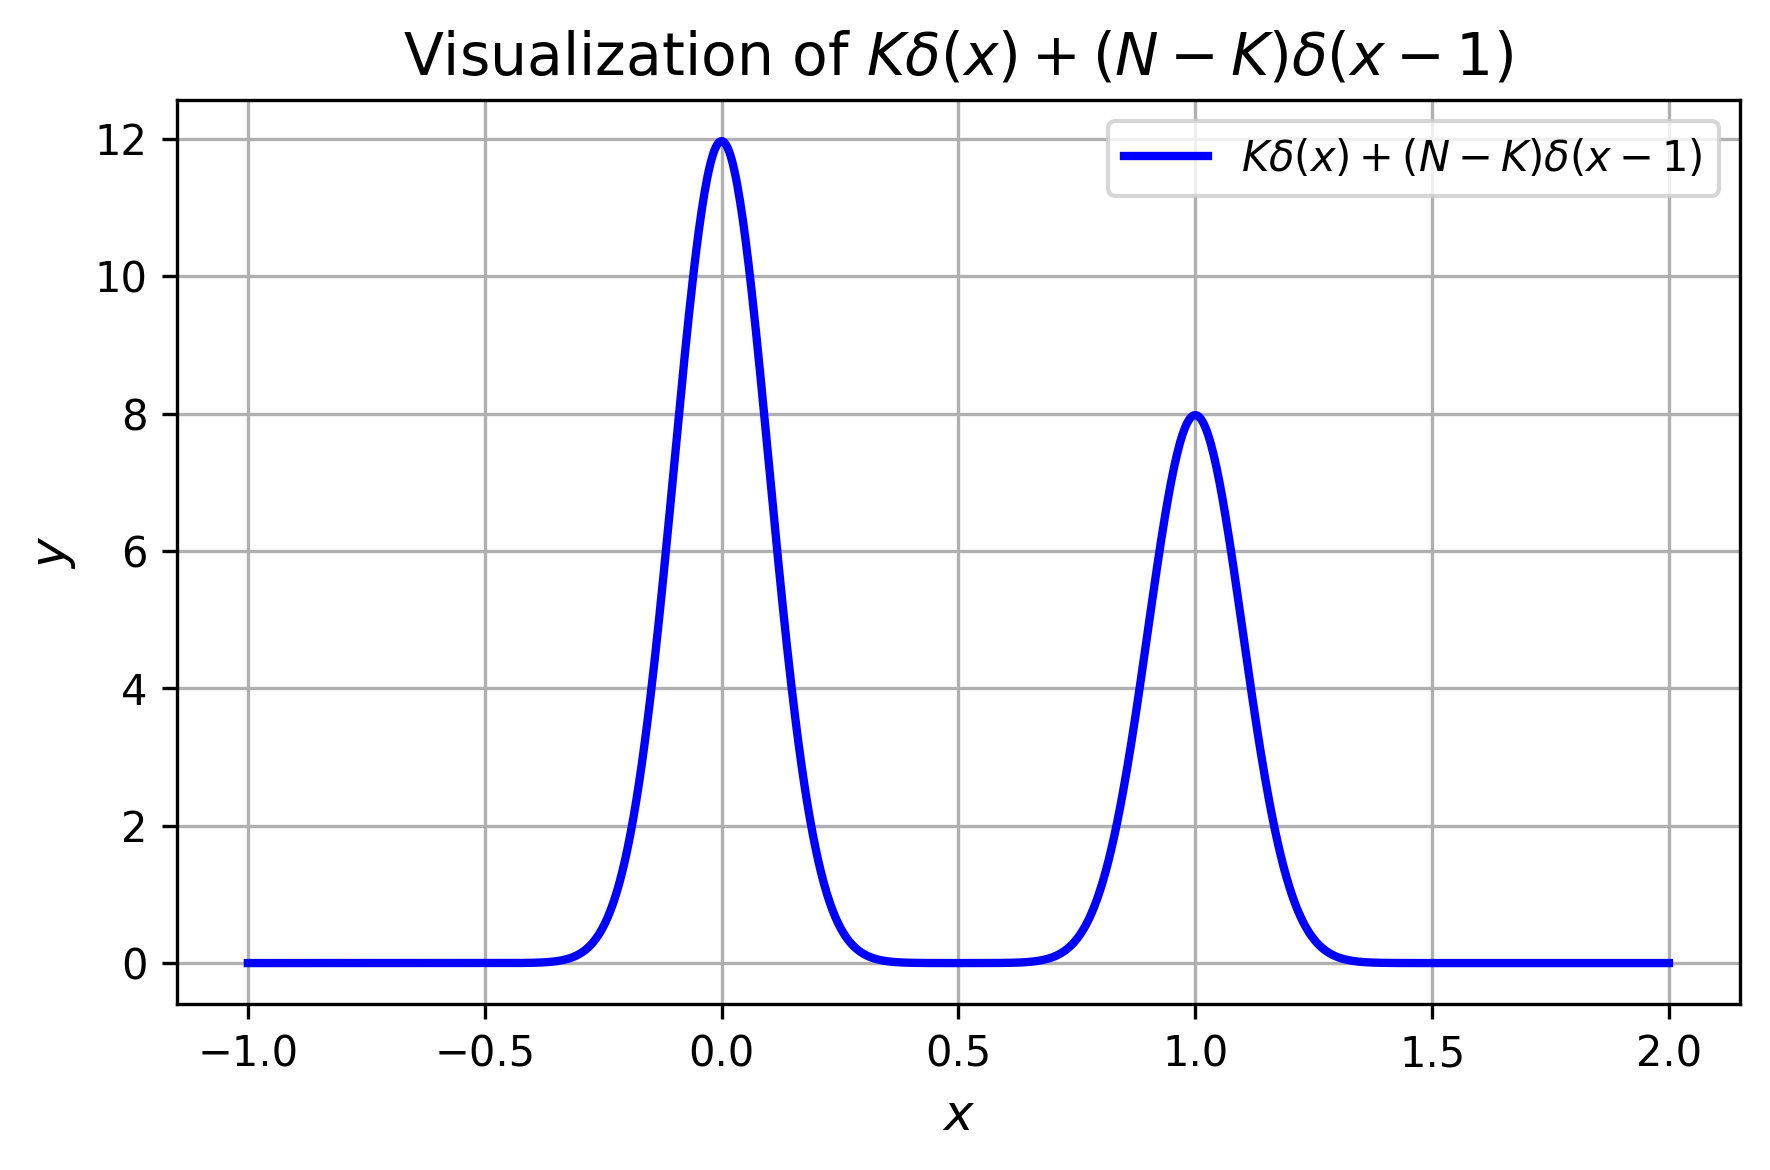

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Gaussian approximation to the Dirac delta function
def dirac_delta_approx(x, center, epsilon=0.00000000000000000000000001):
    return np.exp(-(x-center)**2 / (2 * epsilon**2)) / (np.sqrt(2 * np.pi * epsilon**2))

# Parameters
K = 3  # Scaling factor for delta at x=0
N = 5  # Total scaling factor (K + (N-K) = N)
epsilon = 0.1  # Width of the Gaussian approximation
x = np.linspace(-1, 2, 1000)

# Generate the Dirac delta approximations
delta_0 = K * dirac_delta_approx(x, 0, epsilon)
delta_1 = (N - K) * dirac_delta_approx(x, 1, epsilon)

# Combine the two delta functions
y = delta_0 + delta_1

# Plotting
plt.figure(figsize=(6, 4), dpi=300)
plt.plot(x, y, label=r'$K\delta(x) + (N-K)\delta(x-1)$', color='blue', lw=2)
plt.title(r'Visualization of $K\delta(x) + (N-K)\delta(x-1)$', fontsize=14)
plt.xlabel(r'$x$', fontsize=12)
plt.ylabel(r'$y$', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()